Tugas Akhir Kelas Machine Learning Pemula (mengenali bentuk tanggan dengan bentuk rock, paper, dan scissors)

Nama : Muhammad Azriel

Tempat : Kabupaten Bekasi, Jawa Barat

Email : azriel.imanto@gmail.com

In [1]:
import tensorflow as tf
import zipfile,os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
print (tf.__version__)

2.4.1


In [2]:
!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-02 01:49:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.63MB/s    in 35s     

2021-05-02 01:50:28 (8.89 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
#membuka file dan menexractnya
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir, 'rps-cv-images')

In [4]:
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images', 'README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [5]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'rock', 'paper', 'scissors']

In [6]:
#membuat direktori latih dan vallidation
train_paper_dir = os.path.join(train_dir, 'paper')
train_sccisors_dir = os.path.join(train_dir, 'scissors')
train_rock_dir = os.path.join(train_dir, 'rock')
 

validation_paper_dir = os.path.join(train_dir, 'paper')
validation_sccisors_dir = os.path.join(train_dir, 'scissors')
validation_rock_dir = os.path.join(train_dir, 'rock')

In [7]:
#image data generator 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split=0.4)
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split=0.4)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150), 
        batch_size=4,
        class_mode='categorical',
        subset='training')
 
validation_generator = test_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
#compile model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')       
])

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# latih model
model.fit(
      train_generator,
      steps_per_epoch=26,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
26/26 - 4s - loss: 1.1074 - accuracy: 0.4020 - val_loss: 1.1292 - val_accuracy: 0.2000
Epoch 2/20
26/26 - 3s - loss: 1.0958 - accuracy: 0.3462 - val_loss: 1.0799 - val_accuracy: 0.3500
Epoch 3/20
26/26 - 3s - loss: 1.0265 - accuracy: 0.4808 - val_loss: 0.8043 - val_accuracy: 0.6500
Epoch 4/20
26/26 - 3s - loss: 0.7104 - accuracy: 0.7404 - val_loss: 0.2814 - val_accuracy: 0.8500
Epoch 5/20
26/26 - 3s - loss: 0.4253 - accuracy: 0.8235 - val_loss: 0.4524 - val_accuracy: 0.7500
Epoch 6/20
26/26 - 3s - loss: 0.4356 - accuracy: 0.8558 - val_loss: 0.6661 - val_accuracy: 0.7500
Epoch 7/20
26/26 - 3s - loss: 0.4715 - accuracy: 0.7885 - val_loss: 0.3906 - val_accuracy: 0.9000
Epoch 8/20
26/26 - 3s - loss: 0.3625 - accuracy: 0.8269 - val_loss: 0.3437 - val_accuracy: 0.9000
Epoch 9/20
26/26 - 3s - loss: 0.3835 - accuracy: 0.8558 - val_loss: 0.2436 - val_accuracy: 0.9500
Epoch 10/20
26/26 - 3s - loss: 0.2877 - accuracy: 0.8942 - val_loss: 0.2770 - val_accuracy: 0.9500
Epoch 11/20
26/26 -

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving S__68091910.jpg to S__68091910.jpg
S__68091910.jpg
Paper


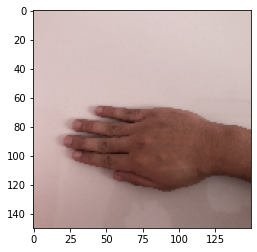

In [22]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('Paper')
  elif classes[0][1]==1:
    print('Rock')
  elif classes[0][2]==1:
    print('Scissors')
  else:
    print('Unknown')   